## Exploratory analysis on dataset - Terrorism

### Author name: Manikya Ravindra Kolekar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')
df1

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,197503270005,1975,3,27,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
2905,197503270006,1975,3,27,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
2906,197503270007,1975,3,27,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
2907,197503270008,1975,3,27,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,1.0,1.0,1.0,1.0,NaN


In [3]:
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
df1.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [5]:
df1 = df1[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]
df1.head(20)

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft


In [6]:
df1.shape

(2909, 18)

In [7]:
df1.isnull().sum()

Year             0
Month            0
day              0
Country          0
State           10
Region           0
City             0
latitude        48
longitude       48
Attacktype       0
kill           305
Wound         1062
target1         47
summary       2188
Group            0
Targettype       0
Weapon           0
motive        2449
dtype: int64

In [8]:
df1.isnull().sum().sum()

6157

In [9]:
df1['Wound'] = df1['Wound'].fillna(0)
df1['kill'] = df1['kill'].fillna(0)

In [10]:
df1['Casualities'] = df1['kill'] + df1['Wound']
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2909 non-null   int64  
 1   Month        2909 non-null   int64  
 2   day          2909 non-null   int64  
 3   Country      2909 non-null   object 
 4   State        2899 non-null   object 
 5   Region       2909 non-null   object 
 6   City         2909 non-null   object 
 7   latitude     2861 non-null   float64
 8   longitude    2861 non-null   float64
 9   Attacktype   2909 non-null   object 
 10  kill         2909 non-null   float64
 11  Wound        2909 non-null   float64
 12  target1      2862 non-null   object 
 13  summary      721 non-null    object 
 14  Group        2909 non-null   object 
 15  Targettype   2909 non-null   object 
 16  Weapon       2909 non-null   object 
 17  motive       460 non-null    object 
 18  Casualities  2909 non-null   float64
dtypes: flo

In [11]:
df1.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,2909.000000,2909.000000,2909.000000,2861.000000,2861.000000,2909.000000,2909.000000,2909.000000
mean,1972.122723,6.138536,15.382606,35.713904,-35.403239,0.662427,0.778962,1.441389
std,1.585828,3.421309,9.095383,24.617529,53.617887,3.053991,7.223654,8.385470
min,1970.000000,0.000000,0.000000,-43.532054,-157.818968,0.000000,0.000000,0.000000
25%,1971.000000,3.000000,7.000000,34.097866,-75.135490,0.000000,0.000000,0.000000
50%,1972.000000,6.000000,16.000000,40.697132,-7.312045,0.000000,0.000000,0.000000
75%,1974.000000,9.000000,23.000000,54.183052,-1.977903,1.000000,0.000000,1.000000
max,1975.000000,12.000000,31.000000,59.332788,172.636225,88.000000,238.000000,239.000000


In [12]:
df1.corr()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
Year,1.000000,-0.062903,-0.006332,-0.003970,0.321162,0.071395,0.061536,0.079012
Month,-0.062903,1.000000,0.070656,-0.008822,0.088028,0.017675,0.005121,0.010849
day,-0.006332,0.070656,1.000000,-0.019924,-0.006608,0.005716,-0.025332,-0.019741
latitude,-0.003970,-0.008822,-0.019924,1.000000,0.212835,0.062560,0.020433,0.039751
longitude,0.321162,0.088028,-0.006608,0.212835,1.000000,0.150423,0.056275,0.101762
kill,0.071395,0.017675,0.005716,0.062560,0.150423,1.000000,0.199630,0.536172
Wound,0.061536,0.005121,-0.025332,0.020433,0.056275,0.199630,1.000000,0.934154
Casualities,0.079012,0.010849,-0.019741,0.039751,0.101762,0.536172,0.934154,1.000000


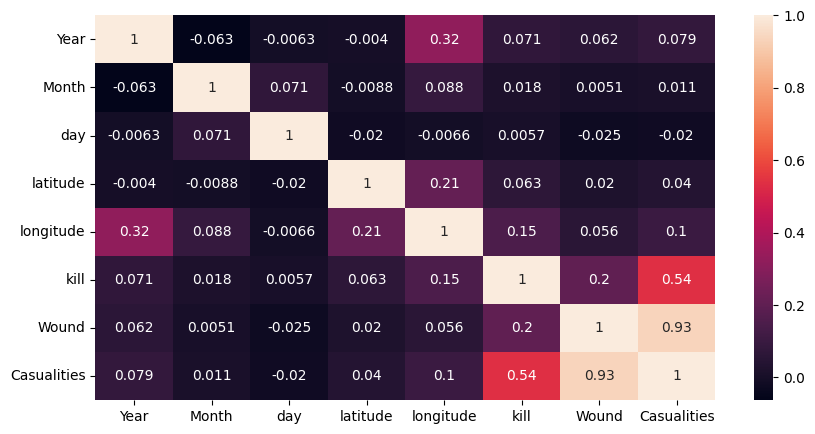

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot=True)
plt.show()

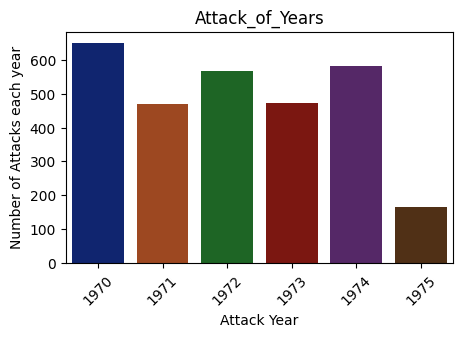

In [17]:
x_year = df1['Year'].unique()
y_count_years = df1['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (5,3))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'dark')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

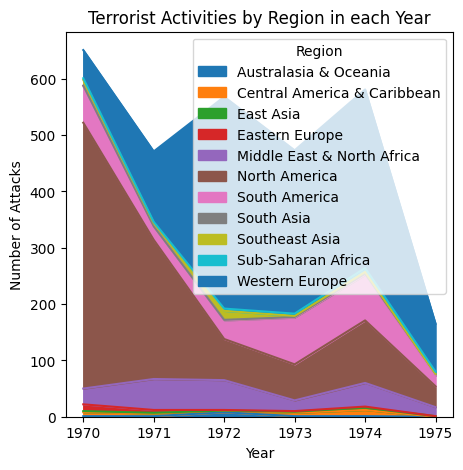

In [21]:
pd.crosstab(df1.Year, df1.Region).plot(kind='area',figsize=(5,5))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

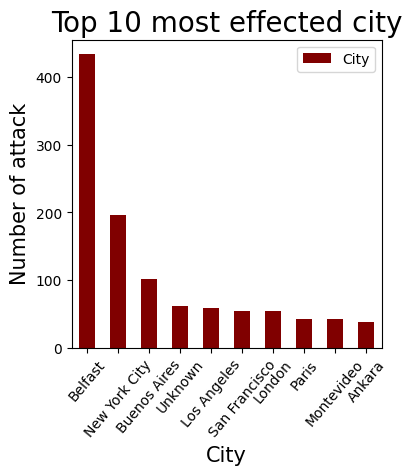

In [27]:
df1['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(4,4),color=['maroon'])
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

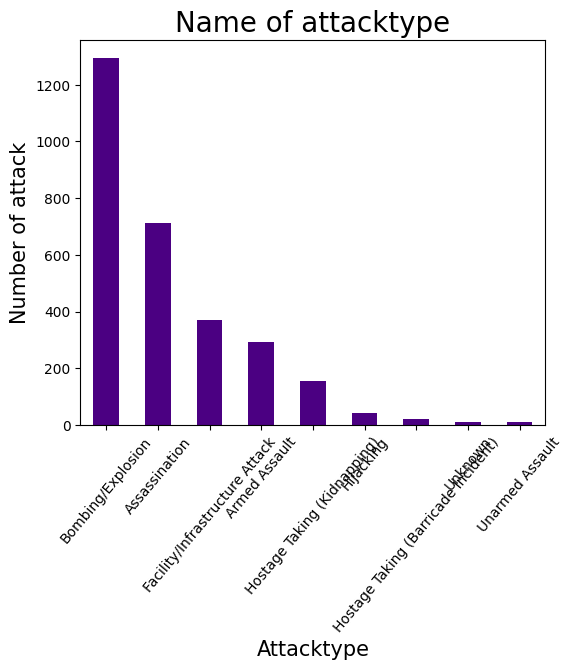

In [30]:
df1['Attacktype'].value_counts().plot(kind='bar',figsize=(6,5),color='indigo')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

### Thank you